# Faults

A tutorial on the `Faults` component.

## Basic properties

Faults are discontinuities in a volume of rock, across which movement in the crust has caused rock volumes on opposite sides to be displaced relative to each other. Faults may have a signiﬁcantly higher or
lower ability to transmit ﬂuids than the surrounding rocks, depending upon whether the void space has been ﬁlled with clay material. [[Lie K-A. An Introduction to Reservoir Simulation Using MATLAB/GNU Octave: User Guide for the MATLAB Reservoir Simulation Toolbox (MRST)](https://www.cambridge.org/core/books/an-introduction-to-reservoir-simulation-using-matlabgnu-octave/F48C3D8C88A3F67E4D97D4E16970F894)]

Faults are represented in `.DATA` files by keyword `FAULTS`. This keyword is often followed by the keyword `MULTFLT`

Required imports:

In [1]:
import sys
sys.path.append('..')

from deepfield import Field

Load a model with faults

In [2]:
model = Field('../open_data/norne/NORNE_ATW2013.DATA').load()

INFO:Field:Using default config.
...
INFO:Field:===== Field summary =====
INFO:Field:GRID attributes: MAPAXES, DIMENS, COORD, ZCORN, ACTNUM, MINPV
INFO:Field:ROCK attributes: PORO, NTG, PERMX, PERMY, PERMZ, MULTZ, SWATINIT, SWL, SWCR, SGU, SGL, SGCR, SOWCR, SOGCR, SWU, ISWCR, ISGU, ISWL, ISWU, ISGL, ISOGCR, ISOWCR
INFO:Field:STATES attributes: 
INFO:Field:TABLES attributes: PVTO, ROCK, PVTW, DENSITY, SWOF, SGOF, PVDG
INFO:Field:WELLS attributes: COMPDAT, WELSPECS, WCONINJE, WCONPROD
INFO:Field:FAULTS attributes: FAULTS, MULTFLT
INFO:Field:AQUIFERS attributes: 
INFO:Field:=========================


All fault names are contained in the attribute `names` of the component `faults`:

In [3]:
print(model.faults.names)

['B2', 'BC', 'CD', 'CD_0', 'CD_1', 'CD_B3', 'CD_To', 'C_01', 'C_01_Ti', 'C_02', 'C_04', 'C_05', 'C_06', 'C_08', 'C_08_Ile', 'C_08_S', 'C_08_S_Ti', 'C_08_Ti', 'C_09', 'C_10', 'C_12', 'C_20', 'C_20_LTo', 'C_21', 'C_21_Ti', 'C_22', 'C_23', 'C_24', 'C_25', 'C_26', 'C_26N', 'C_27', 'C_28', 'C_29', 'DE_0', 'DE_1', 'DE_1_LTo', 'DE_2', 'DE_B3', 'DI', 'DI_S', 'D_05', 'EF', 'E_01', 'E_01_F3', 'GH', 'G_01', 'G_02', 'G_03', 'G_05', 'G_07', 'G_08', 'G_09', 'G_13', 'H_03', 'IH', 'm_east', 'm_east_2', 'm_north', 'm_northe', 'm_west']


and can be shown in a tree-like structure

In [4]:
model.faults.render_tree()

FIELD
|-- B2
|-- BC
|-- CD
|-- CD_0
|-- CD_1
|-- CD_B3
|-- CD_To
|-- C_01
|-- C_01_Ti
|-- C_02
|-- C_04
|-- C_05
|-- C_06
|-- C_08
|-- C_08_Ile
|-- C_08_S
|-- C_08_S_Ti
|-- C_08_Ti
|-- C_09
|-- C_10
|-- C_12
|-- C_20
|-- C_20_LTo
|-- C_21
|-- C_21_Ti
|-- C_22
|-- C_23
|-- C_24
|-- C_25
|-- C_26
|-- C_26N
|-- C_27
|-- C_28
|-- C_29
|-- DE_0
|-- DE_1
|-- DE_1_LTo
|-- DE_2
|-- DE_B3
|-- DI
|-- DI_S
|-- D_05
|-- EF
|-- E_01
|-- E_01_F3
|-- GH
|-- G_01
|-- G_02
|-- G_03
|-- G_05
|-- G_07
|-- G_08
|-- G_09
|-- G_13
|-- H_03
|-- IH
|-- m_east
|-- m_east_2
|-- m_north
|-- m_northe
+-- m_west


Each fault can be accessed by its name:

In [5]:
model.faults['C_05']

Fault contains attributes that describe its properties and position: 

In [6]:
model.faults['C_05'].attributes

('FAULTS', 'MULTFLT')

The attribute `FAULTS` is a table that contains information about faults geometry:

In [7]:
model.faults['C_05'].faults

,NAME,IX1,IX2,IY1,IY2,IZ1,IZ2,FACE
0,C_05,13,13,42,42,1,22,X
1,C_05,14,14,43,43,1,22,Y
2,C_05,13,13,43,43,1,22,X
3,C_05,14,14,44,44,1,22,X


In addition, some faults may have a `MULTFLT` attribute. The `MULTFLT` attribute can be used to modify the permeability (and diffusivity) along a fault defined using the `FAULTS` keyword 

In [8]:
model.faults['C_05'].multflt

,NAME,MULT
0,C_05,0.1


## Faults visualization

Visualization of faults faces requires coordinates of its vertices. The method `get_blocks` finds blocks and its vertices that lie on the fault surface:

In [9]:
model.faults.get_blocks()

Now attribute `blocks` contains block indices:

In [10]:
model.faults['C_05'].blocks

array([[12, 41,  0],
       [12, 41,  1],
       [12, 41,  2],
       [12, 41,  3],
       [12, 41,  4],
       ...,
       [13, 43, 17],
       [13, 43, 18],
       [13, 43, 19],
       [13, 43, 20],
       [13, 43, 21]])

Coordinates of faults faces vertices can be obtained via `faces_verts` attribute

In [11]:
model.faults['C_05'].faces_verts

array([[[4.57618688e+05, 7.32253800e+06, 2.53669507e+03],
        [4.57672809e+05, 7.32260556e+06, 2.54121802e+03],
        [4.57618288e+05, 7.32253747e+06, 2.54681494e+03],
        [4.57672447e+05, 7.32260500e+06, 2.55139404e+03]],

       [[4.57618288e+05, 7.32253747e+06, 2.54681494e+03],
        [4.57672447e+05, 7.32260500e+06, 2.55139404e+03],
        [4.57617834e+05, 7.32253687e+06, 2.55828809e+03],
        [4.57672035e+05, 7.32260435e+06, 2.56299707e+03]],

       [[4.57617834e+05, 7.32253687e+06, 2.55828809e+03],
        [4.57672035e+05, 7.32260435e+06, 2.56299707e+03],
        [4.57617400e+05, 7.32253630e+06, 2.56928491e+03],
        [4.57671656e+05, 7.32260377e+06, 2.57365210e+03]],

       ...,

       [[4.57780901e+05, 7.32258003e+06, 2.69066699e+03],
        [4.57835360e+05, 7.32264885e+06, 2.68327393e+03],
        [4.57780576e+05, 7.32257748e+06, 2.71275098e+03],
        [4.57835213e+05, 7.32264622e+06, 2.70450488e+03]],

       [[4.57780576e+05, 7.32257748e+06, 2.71275098

Fault are visualized using the built-in interactive 3D viewer:
```python
model.show(attr='PORO')
```
This creates a separate interactive window that allows zooming in and out and rotating (see the tutorial on visualization for more options). Below we demonstrate some static screenshots with faults names and faces shown in red:

 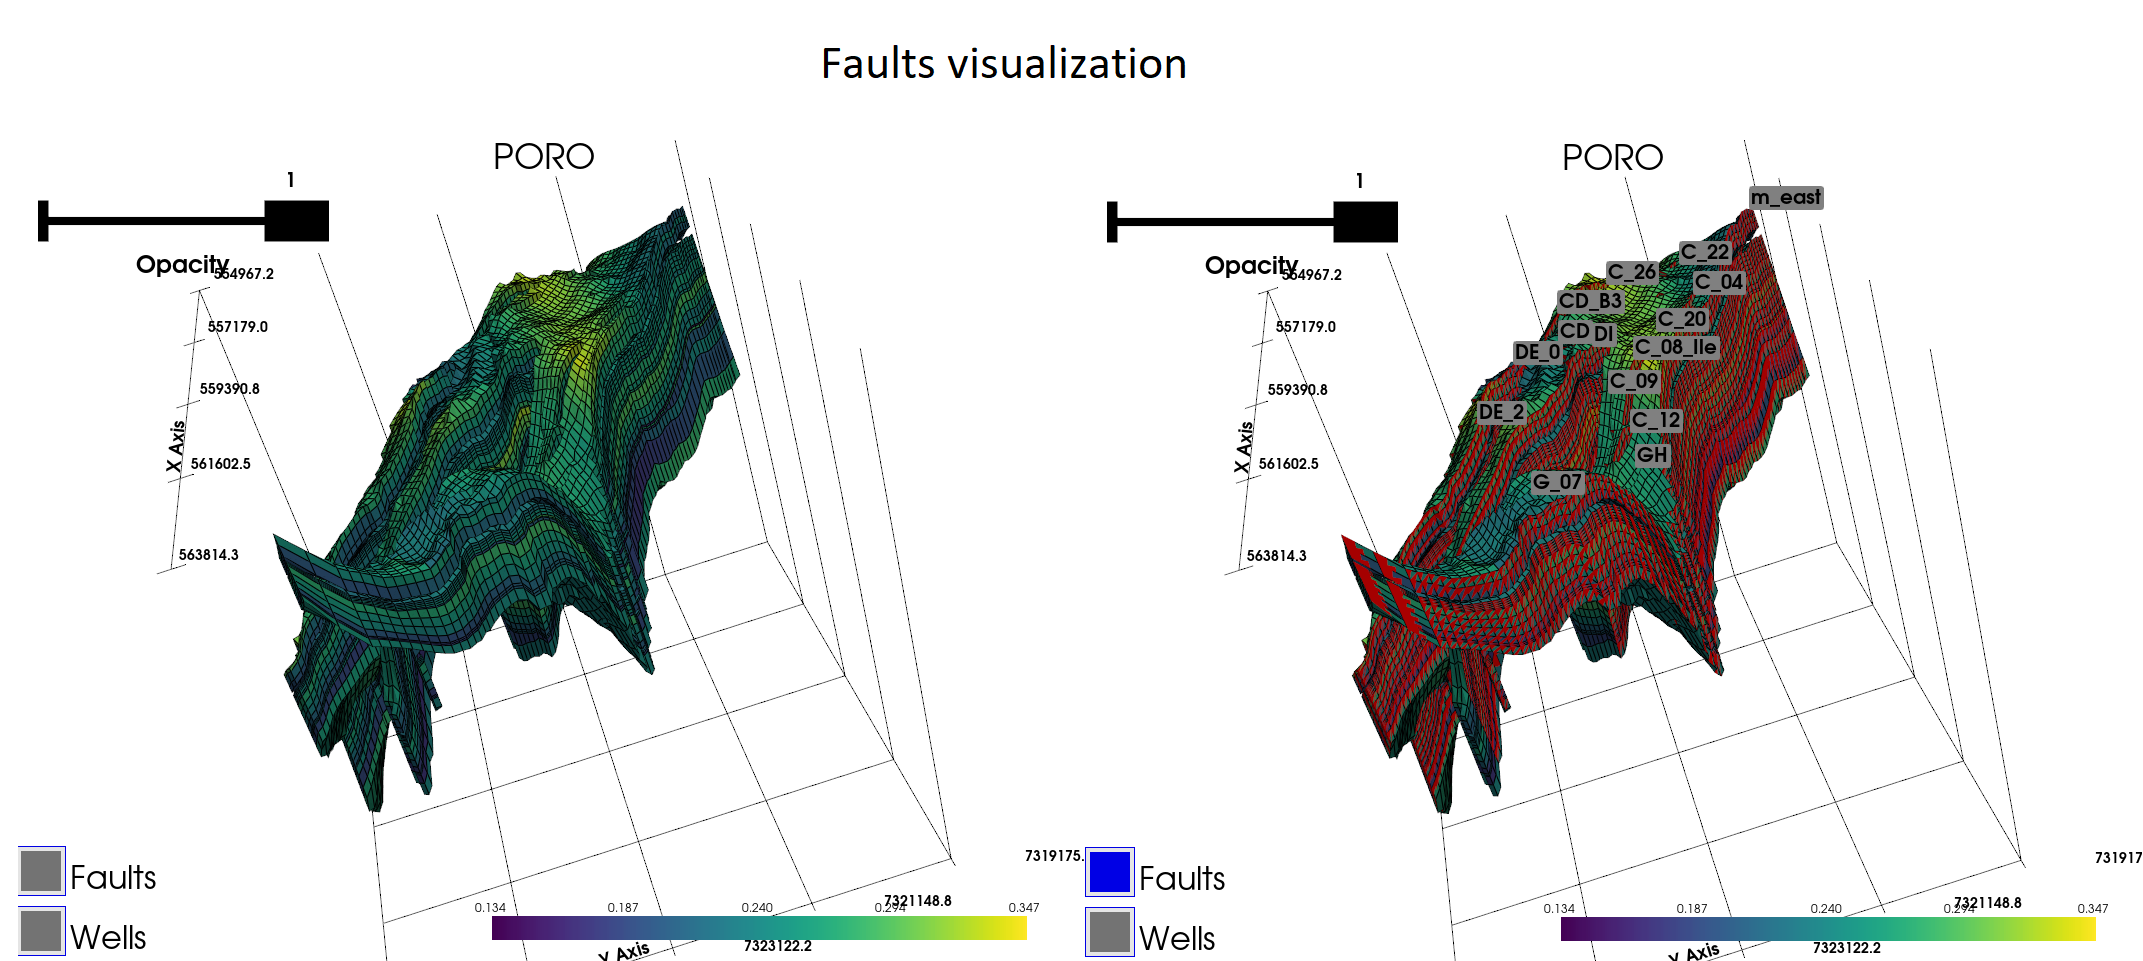

Finally, to remove a particular fault, use the method `drop`:

In [12]:
print('C_05' in model.faults.names)
model.faults.drop('C_05')
print('C_05' in model.faults.names)

True
False


Done!